In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats
np.random.seed(123)

In [28]:
draws = 20000
coin_sample = np.random.binomial(1, 0.5, draws)
coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]

heads = np.sum(coin_sample[coin_sample==1])
print('Heads: ', heads, heads/draws)
print('Tails: ', 20000-heads, 1-heads/draws)

Heads:  9943 0.49715
Tails:  10057 0.50285


In [49]:
#1a 
for i in [5,10,30,1000]:
    draws = i
    coin_sample = np.random.binomial(1, 0.5, draws)
    coin_average = [coin_sample[:jj].mean() for jj in range(1, draws)]
    heads = np.sum(coin_sample[coin_sample==1])
    print('Heads: ', heads, 'with the mean', heads/draws)
    print('Tails: ', i-heads, 'with the mean', 1-heads/draws)
    #1b
    print('Hypo test',stats.binom_test(x=[i-heads, heads], p=0.5, alternative='two-sided'))

Heads:  4 with the mean 0.8
Tails:  1 with the mean 0.19999999999999996
Hypo test 0.375
Heads:  3 with the mean 0.3
Tails:  7 with the mean 0.7
Hypo test 0.3437499999999999
Heads:  10 with the mean 0.3333333333333333
Tails:  20 with the mean 0.6666666666666667
Hypo test 0.09873714670538908
Heads:  502 with the mean 0.502
Tails:  498 with the mean 0.498
Hypo test 0.9244256441410681


In [ ]:
#se observă că dacă facem din ce în ce mai multe încercări, probabilitățile de succes, respectiv eșec, tind sa fie egale, adică 
#cât la mai multe aruncări avem șanse egale să obținem atât cap, cât și pajură.

In [58]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = [5, 10, 30]

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print (start)
end = m + h
print (end)

-17.862053039878006
47.862053039878006


In [67]:
pearson = pd.read_csv('http://www-eio.upc.edu/~pau/cms/rdata/csv/HistData/PearsonLee.csv')

In [71]:
#pearson.head(10)

In [72]:
ms = pearson[pearson['gp']=='ms']
md = pearson[pearson['gp']=='md']

In [75]:
a=stats.pearsonr(ms['parent'], ms['child'])
print(a)

(0.48491768425178605, 9.100362271637274e-12)


In [76]:
b=stats.pearsonr(md['parent'], md['child'])
print(b)

(0.4674367713012403, 1.9747722235598635e-11)


In [78]:
print(np.corrcoef([a,b]))

[[1. 1.]
 [1. 1.]]


In [81]:
fs = pearson[pearson['gp']=='fs']
fd = pearson[pearson['gp']=='fd']
c=stats.pearsonr(fs['parent'], fs['child'])
d=stats.pearsonr(fd['parent'], fd['child'])
print(c,d)
print(np.corrcoef([c,d]))

(0.5206723830914775, 7.954369816601039e-14) (0.4720530065221036, 7.905672025207683e-13)
[[1. 1.]
 [1. 1.]]


In [ ]:
########## pentru partea de regresie liniara

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

col_list = ['#cc615c', '#6965a7', '#f1bdbf']
sns.set_palette(col_list)

In [2]:
credit_df = pd.read_csv('credit.csv', index_col=0)

In [3]:
credit_df.Gender = credit_df.Gender.astype('category')
credit_df.Student = credit_df.Student.astype('category')
credit_df.Married = credit_df.Married.astype('category')
credit_df.Ethnicity = credit_df.Ethnicity.astype('category')

In [4]:
credit_df.describe()

,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
credit_df.head()

,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Income,,,,,,,,,,
14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
104.593,7075,514,4,71,11,Male,No,No,Asian,580
148.924,9504,681,3,36,11,Female,No,No,Asian,964
55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
credit_df.describe(include=['category'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


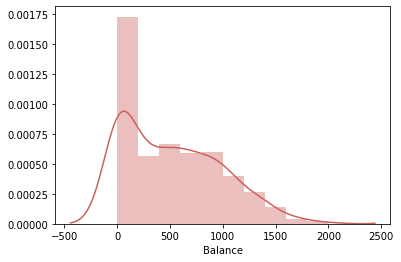

In [7]:
sns.distplot(credit_df.Balance)

In [8]:
active_credit_df = credit_df.loc[credit_df.Balance>0,].copy()
active_credit_df.Balance.describe() 

count     310.000000
mean      670.987097
std       413.904019
min         5.000000
25%       338.000000
50%       637.500000
75%       960.750000
max      1999.000000
Name: Balance, dtype: float64

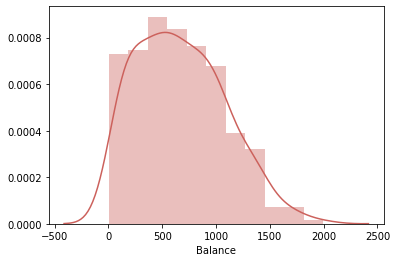

In [9]:
sns.distplot(active_credit_df.Balance)

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

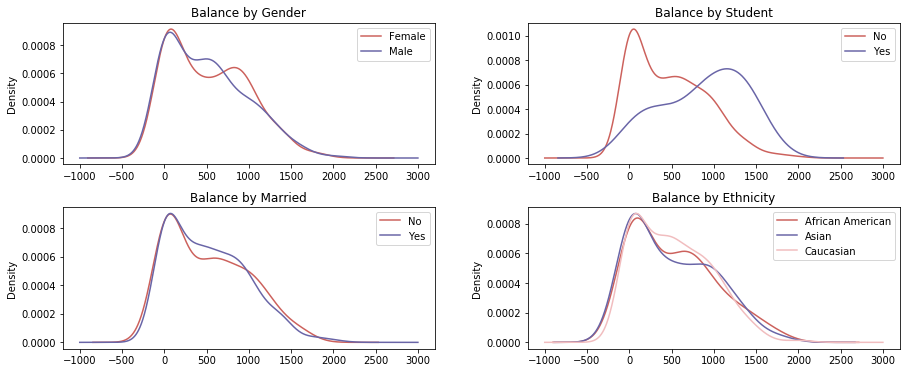

In [10]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

In [11]:
#Student appears to be the only predictor to influence the distribution of Balance.
#To verify, the same relationships can be analyzed on the active-only sample of the population.

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

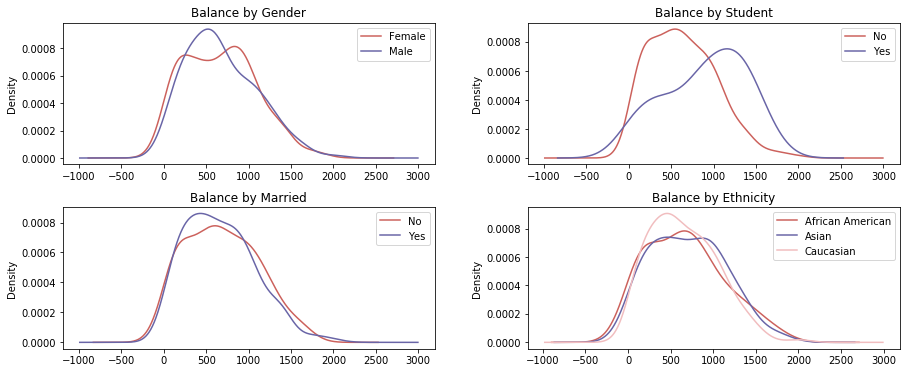

In [12]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
active_credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
active_credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
active_credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
active_credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

In [13]:
#Although the variables Gender, Married, and Ethnicity do not appear associated with Balance when observed in isolation, their interaction with one another might make them valuable.
#This will be investigated at a later point in the analysis.
#The Student variable should be closely examined at this point.

C:\Users\Gabriela\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


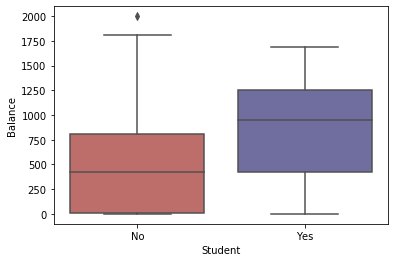

In [14]:
sns.boxplot(x='Student', y='Balance', data = credit_df)

In [15]:
#active_mod0 = smf.ols('Balance' ~ 'Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = credit_df).fit()
#active_mod0.summary()

In [22]:
mod = smf.ols('Balance ~ Rating' , credit_df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        16:58:18   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
mod1 = smf.ols('Balance ~ Cards' , credit_df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.997
Date:                Thu, 14 Nov 2019   Prob (F-statistic):             0.0842
Time:                        16:58:47   Log-Likelihood:                -3017.9
No. Observations:                 400   AIC:                             6040.
Df Residuals:                     398   BIC:                             6048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903
==============================================================================
Omnibus:                       28.964   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.603
Skew:                           0.566   Prob(JB):                     1.67e-06
Kurtosis:                       2.437   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
mod2 = smf.ols('Balance ~ Age' , credit_df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.971
Time:                        16:59:07   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675
==============================================================================
Omnibus:                       28.715   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.393
Skew:                           0.582   Prob(JB):                     1.13e-06
Kurtosis:                       2.463   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
mod3 = smf.ols('Balance ~ Education' , credit_df).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02587
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.872
Time:                        16:59:32   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311
==============================================================================
Omnibus:                       28.655   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.467
Skew:                           0.584   Prob(JB):                     1.09e-06
Kurtosis:                       2.467   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
mod4 = smf.ols('Balance ~ Gender' , credit_df).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.669
Time:                        16:59:46   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
mod5 = smf.ols('Balance ~ Student' , credit_df).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.49e-07
Time:                        17:01:27   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
mod6 = smf.ols('Balance ~ Married' , credit_df).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01281
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.910
Time:                        17:01:30   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        523.2903     36.974     14.153      0.000     450.601     595.980
Married[T.Yes]    -5.3475     47.244     -0.113      0.910     -98.227      87.532
==============================================================================
Omnibus:                       28.640   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.347
Skew:                           0.582   Prob(JB):                     1.15e-06
Kurtosis:                       2.464   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
mod7 = smf.ols('Balance ~ Ethnicity' , credit_df).fit()
mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.957
Time:                        17:01:35   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
mod7 = smf.ols('Balance ~ Income' , credit_df).fit()
mod7.summary()

PatsyError: Error evaluating factor: NameError: name 'Income' is not defined
    Balance ~ Income
              ^^^^^^